# **Roboflow Dataset Link** - 'https://universe.roboflow.com/helmet-yolov5/helmet-detection-ar0n2'

# **Install Dependencies**

In [1]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 138.1 MB/s eta 0:00:00


# **Import Modules**

In [4]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
from roboflow import Roboflow

# **Load The Dataset**

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="5tiVmFnSNXE8lmBhSdK1")
project = rf.workspace("helmet-yolov5").project("helmet-detection-ar0n2")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to helmet-detection-1 in yolov8:: 100%|██████████| 3000/3000 [00:00<00:00, 8518.16it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Data Preprocessing**

In [6]:
old_name = 'helmet-detection-1'
new_name = 'Helmet-Detection'

# Rename the directory
os.rename(old_name, new_name)

print(dataset.location)

/content/helmet-detection-1


In [7]:
dataset.location = '/content/Helmet-Detection'

In [8]:
import yaml

# Fix / Overwrite data.yaml File (For YOLOv8)

FIXED_YAML_PATH = f"{dataset.location}/data_fixed.yaml"

data = {
    'path': dataset.location,
    'train': 'train/images',
    'val': 'valid/images',
    'test' : 'test/images',
    'nc' : 2,
    'names': ['With Helmet', 'Without Helmet']
}

with open(FIXED_YAML_PATH, 'w') as f:
    yaml.dump(data, f)

print('\n data.yaml created at:', FIXED_YAML_PATH)


 data.yaml created at: /content/Helmet-Detection/data_fixed.yaml


In [9]:
import glob

for split in ['train', 'valid', 'test']:
    img_count = len(glob.glob(os.path.join(dataset.location, split, 'images', '*.*')))
    lbl_count = len(glob.glob(os.path.join(dataset.location, split, 'labels', '*.txt')))
    print(f"{split.upper()} -> Images: {img_count} | Labels: {lbl_count}")

TRAIN -> Images: 1299 | Labels: 1299
VALID -> Images: 133 | Labels: 133
TEST -> Images: 62 | Labels: 62


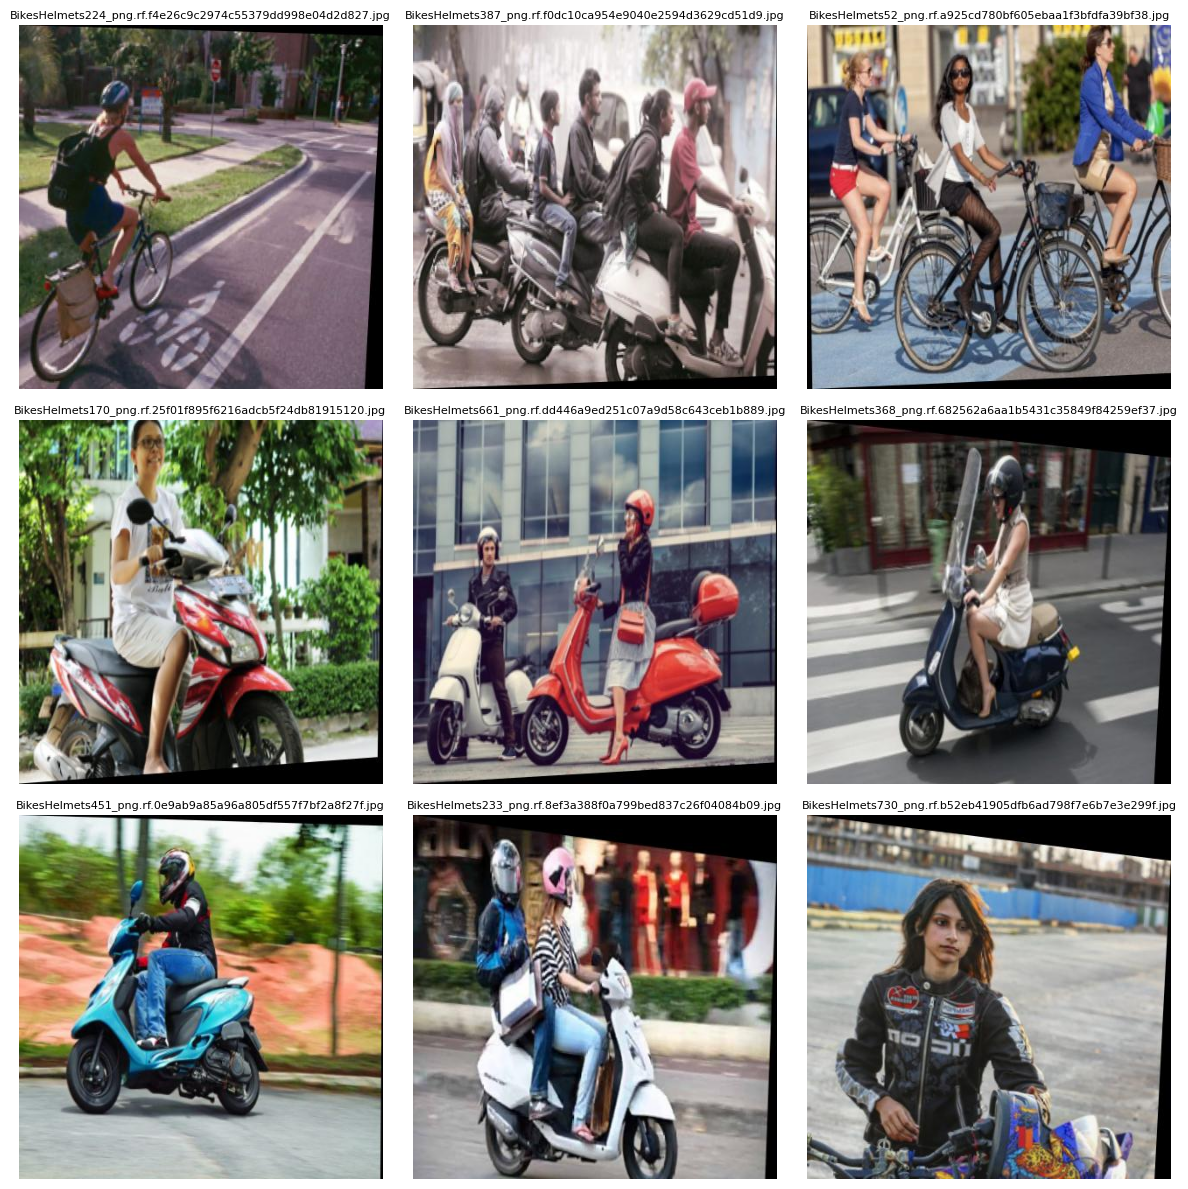

In [10]:
# Visualize Random Train Images (Before Training)

TRAIN_IMG_DIR = f'{dataset.location}/train/images'

train_images = os.listdir(TRAIN_IMG_DIR)
sample_images = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_images):
  image_path = os.path.join(TRAIN_IMG_DIR, image_name)

  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(image_name, fontsize = 8)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Building**

In [14]:
# Load The YOLO Model

model = YOLO('yolov8n.pt')

In [15]:
# Train The YOLO Model

model.train(
    data = FIXED_YAML_PATH,
    epochs = 50,
    batch = 16,
    imgsz = 640,
    name = 'train',
    cache = True,
    exist_ok = True
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Helmet-Detection/data_fixed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f85f0851100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# **Model Evaluation**

In [16]:
# LOAD BEST MODEL

BEST_MODEL_PATH = '/content/runs/detect/train/weights/best.pt'
best_model = YOLO(BEST_MODEL_PATH)

In [17]:
# Evaluate On Test Dataset (After Prediction)

best_model.val(
    data = FIXED_YAML_PATH,
    split = 'test'
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 39.0±66.0 MB/s, size: 27.5 KB)
val: Scanning /content/Helmet-Detection/test/labels... 62 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 62/62 1.2Kit/s 0.1s
val: New cache created: /content/Helmet-Detection/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.7it/s 2.3s
                   all         62        128      0.711      0.648      0.703       0.42
           With Helmet         44         86      0.758      0.826      0.806      0.501
        Without Helmet         20         42      0.664       0.47        0.6      0.338
Speed: 7.5ms preprocess, 6.3ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f83ba4da1e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

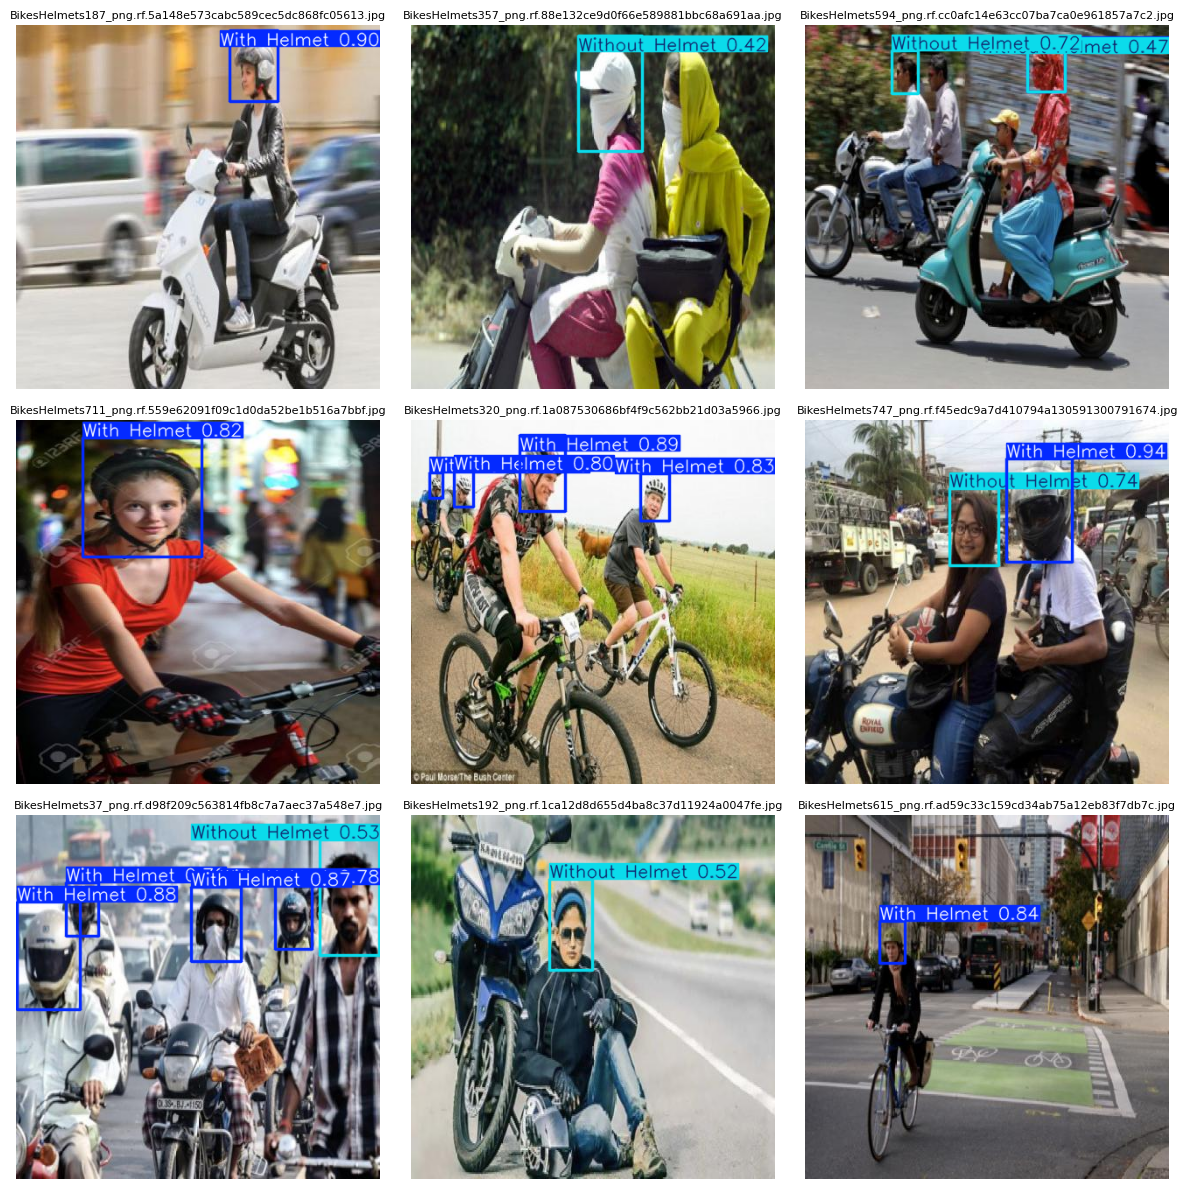

In [18]:
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) - > Plot using yolo's result function

TEST_IMG_DIR = f'{dataset.location}/test/images'

test_images = os.listdir(TEST_IMG_DIR)
sample_test_images = random.sample(test_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_test_images):
  image_path = os.path.join(TEST_IMG_DIR, image_name)

  results = best_model.predict(image_path, conf=0.4, imgsz=640, verbose=False)[0]

  annotated_img = results.plot()
  #annotated_img = results.plot(conf=True, labels=False)

  annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, i+1)
  plt.imshow(annotated_img)
  plt.title(image_name, fontsize=8)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
# DOWNLOAD BEST MODEL (best.pt)

from google.colab import files
files.download(BEST_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>